In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
def diff(func, delta=1e-5):
    """
    Возвращает приближенную производную функции

    Args:
        func (function): функция
        alpha (float, optional): Приращение. Defaults to 1e-5.
    """

    def wrap(x):
        return (func(x + delta) - func(x)) / delta

    return wrap

In [3]:
def just_draw(function, root=None, limits=[-5, 5]):
    if root is None:
        X = np.linspace(*limits, 100)
        y = function(X)
        plt.plot(X, y)
        plt.plot(X, X * 0, color="green")
        return
    plt.scatter(root, function(root), color="red", zorder=2)
    return root

# Численные методы решения уравниний


---

## Задание

-   Построить график уравнения
-   определить корень уравнения графически
-   уточнить решение методом деления отрезка пополам с точностью $\varepsilon$ = 0.01


---

## Метод половинного деления для нахождения корня уравнения


**Основная идея метода**

Технический прием, при котором можно исключать половину отрезка (или любого промежутка) при каждом прохождении функции. Функция будет работать непрерывно до тех пор, пока оставшийся промежуток от деления не будет слишком маленького значения. При каждом прохождении промежуток делится пополам — одна половина «отбрасывается», а вторая снова делится ровно посередине.


**Основные свойства метода**

1. Требует, чтобы функция была непрерывной на заданном отрезке и имела разные знаки на концах этого отрезка.
2. Гарантирует сходимость к корню, но скорость сходимости может быть медленной.
3. Точность результата зависит от выбора начального отрезка и числа итераций.


**_Алгоритм метода_**

1.  Выбирается начальный отрезок $[a, b]$, на котором функция имеет разные знаки
2.  Вычисляется середина отрезка: $c = \frac{a + b}{2}$.
3.  Вычисляется значение функции в середине отрезка: $f(c)$.
4.  Если $f(c)$ близко к нулю, то c является приближенным корнем уравнения.
5.  Если $f(c)$ имеет тот же знак, что и $f(a)$, то новым отрезком становится $[c, b]$.
6.  Если $f(c)$ имеет тот же знак, что и $f(b)$, то новым отрезком становится $[a, c]$.
7.  Шаги 2–6 повторяются до тех пор, пока не будет достигнута заданная точность или максимальное количество итераций.


In [4]:
def bisection_method(func, limits=[-100, 100], epsilon=0.01, max_iter=100_000):
    for iteration in range(max_iter):
        c = sum(limits) / 2
        limits[int(func(limits[0]) * func(c) < 0)] = c
        if abs(func(c)) <= epsilon:
            print("Iteration", iteration)
            return c
    print(limits)
    raise RuntimeError("The maximum number of iterations has been exceeded")

---
### Задание

1. $x^3 + 2x+2 = 0$

2. $x^3 + 15x - 10 = 0$

3. $\ln x - \sin x = 0$

4. $\cos x - x = 0$

5. $\sin x - \sqrt{1- x^2} = 0$ (при х принадлежащем отрезку $[0;1]$)
---


1. $x^3 + 2x+2 = 0$


Iteration 7
Root: -1.76953125


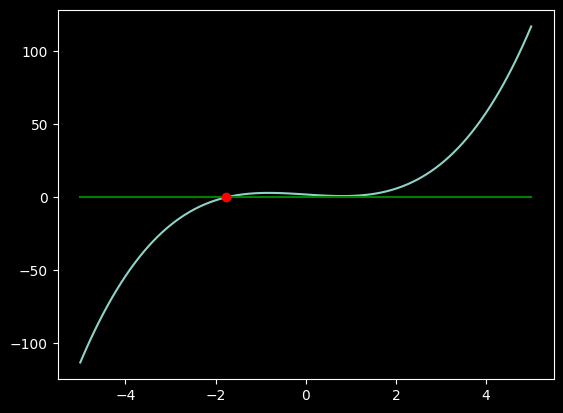

In [5]:
# 1
def function(x):
    return x**3 - x * 2 + 2


just_draw(function)
root = bisection_method(function, [-3, 0])
just_draw(function, root)
print("Root:", root)

2. $x^3 + 15x - 10 = 0$


Iteration 10
Root: 0.64794921875


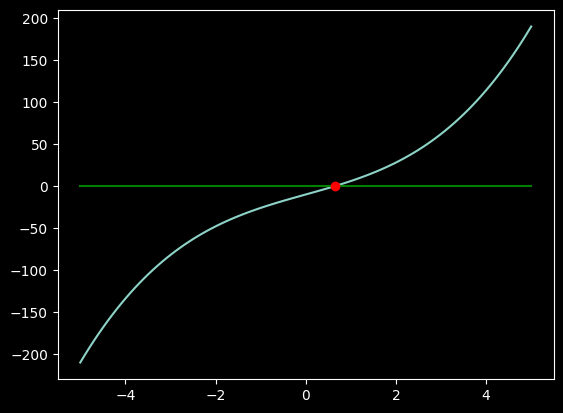

In [6]:
# 2
def function(x):
    return x**3 + 15 * x - 10


just_draw(function)
root = bisection_method(function, [-1, 2])
just_draw(function, root)
print("Root:", root)

3. $\ln x - \sin x = 0$


Iteration 6
Root: 2.21875


C:\Users\DaSh-More\AppData\Local\Temp\ipykernel_2072\75431062.py:3: RuntimeWarning: invalid value encountered in log
  return np.log(x) - np.sin(x)
C:\Users\DaSh-More\AppData\Local\Temp\ipykernel_2072\75431062.py:3: RuntimeWarning: divide by zero encountered in log
  return np.log(x) - np.sin(x)


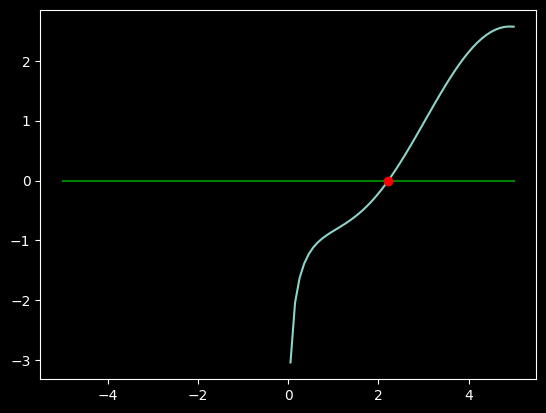

In [7]:
# 3
def function(x):
    return np.log(x) - np.sin(x)


just_draw(function)
root = bisection_method(function, [0, 4])
just_draw(function, root)
print("Root:", root)

4. $\cos x - x = 0$


Iteration 6
Root: 0.734375


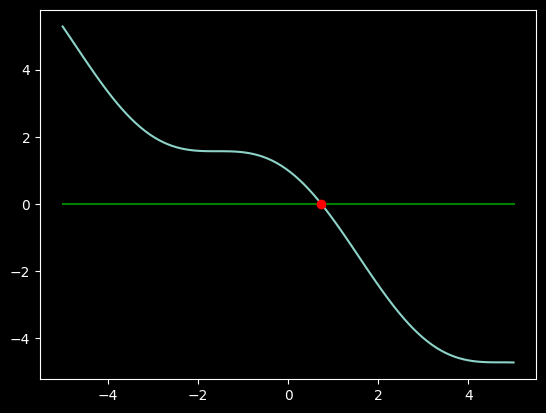

In [8]:
# 4
def function(x):
    return np.cos(x) - x


just_draw(function)
root = bisection_method(function, [0, 2])
just_draw(function, root)
print("Root:", root)

5. $\sin x - \sqrt{1- x^2} = 0$ (при х принадлежащем отрезку $[0;1]$)


Iteration 6
Root: 0.734375


C:\Users\DaSh-More\AppData\Local\Temp\ipykernel_2072\593187527.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sin(x) - (1 - x**2) ** 0.5


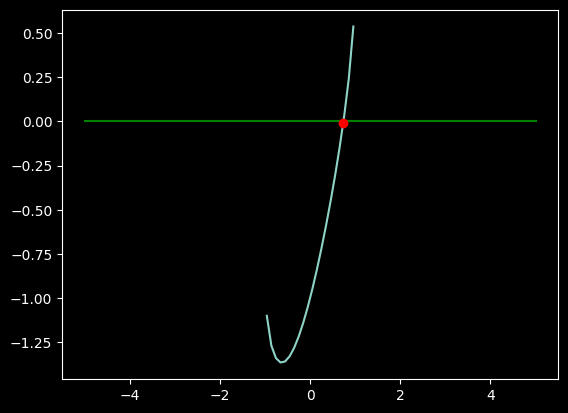

In [9]:
# 5
def function(x):
    return np.sin(x) - (1 - x**2) ** 0.5


just_draw(function)
root = bisection_method(function, [0, 2])
just_draw(function, root)
print("Root:", root)

---

## Метод Ньютона (метод касательных)


**Основная идея метода**

Задаётся начальное приближение вблизи предположительного корня, после чего строится касательная к исследуемой функции в точке приближения, для которой находится пересечение с осью абсцисс. Эта точка и берётся в качестве следующего приближения. И так далее, пока не будет достигнута необходимая точность.


**Основные свойства метода**

1. Метод обладает квадратичной сходимостью.
2. Улучшением метода является метод хорд и касательных.
3. Метод Ньютона может быть использован для решения задач оптимизации, в которых требуется определить нуль первой производной либо градиента в случае многомерного пространства.


**Алгоритм метода**

1. Задаем начальное приближение $X_0$
2. Пока не выполнено условие останова, в качестве которого можно взять $|x_{n+1}-x_n| < \varepsilon$ или $|f(x_{n+1})| < \varepsilon$ (то есть погрешность в нужных пределах), вычисляем новое приближение:
   $x_{n+1} = x_n-\dfrac{f(x_n)}{f'(x_n)}$


In [10]:
def Newton_method(
    func, limits=[-100, 100], x=None, epsilon=0.01, max_iterations=100_000
):
    if x is None:
        x = sum(limits) / 2
    func_diff = diff(func)
    for iteration in range(max_iterations):
        x -= func(x) / func_diff(x)
        if abs(func(x)) < epsilon:
            print("Iteration", iteration)
            return x
        if not (limits[0] <= x <= limits[1]):
            raise ValueError("Root was not found on the segment")
    raise RuntimeError("The maximum number of iterations has been exceeded")

---
### Задание

1. $x^3 + 4x - 4 = 0$

2. $x^3 + 0.5x - 1 = 0$

3. $\cos x + 2x - 1.5 = 0$

4. $\ln x - sin x = 0$

5. $ sin x + x - 1 = 0$

6. $x^3 - 5x^2 + 2x + 8 = 0$
---


1. $x^3 + 4x - 4 = 0$


Iteration 1
Root: 0.848618879358423


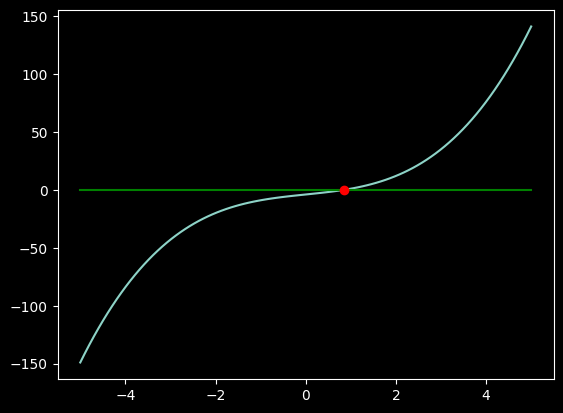

In [11]:
# 1
def function(x):
    return x**3 + 4 * x - 4


just_draw(function)
root = Newton_method(function, [-1, 2])
just_draw(function, root)
print("Root:", root)

2. $x^3 + 0.5x - 1 = 0$


Iteration 1
Root: 0.835579770108499


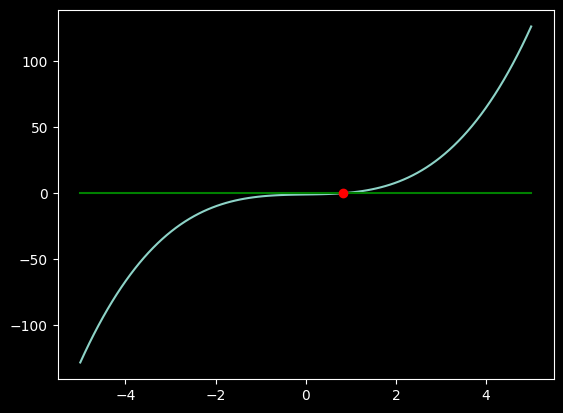

In [12]:
# 2
def function(x):
    return x**3 + 0.5 * x - 1


just_draw(function)
root = Newton_method(function, [0, 2])
just_draw(function, root)
print("Root:", root)

3. $\cos x + 2x - 1.5 = 0$


Iteration 1
Root: 0.26773807211605216


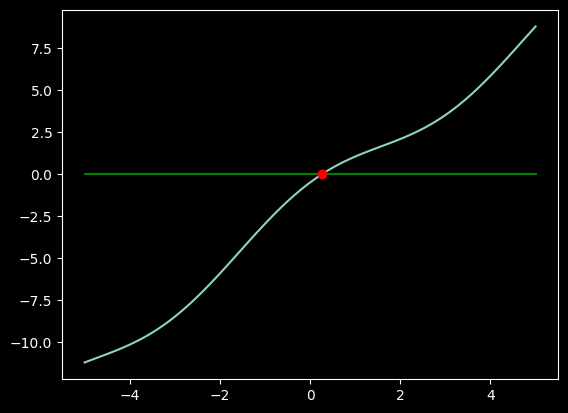

In [13]:
# 3
def function(x):
    return np.cos(x) + 2 * x - 1.5


just_draw(function)
root = Newton_method(function, [-1, 1])
just_draw(function, root)
print("Root:", root)

4. $\ln x - sin x = 0$


C:\Users\DaSh-More\AppData\Local\Temp\ipykernel_2072\2741712553.py:3: RuntimeWarning: invalid value encountered in log
  return np.log(x) - np.sin(x)


Iteration 1
Root: 2.2191855598579164


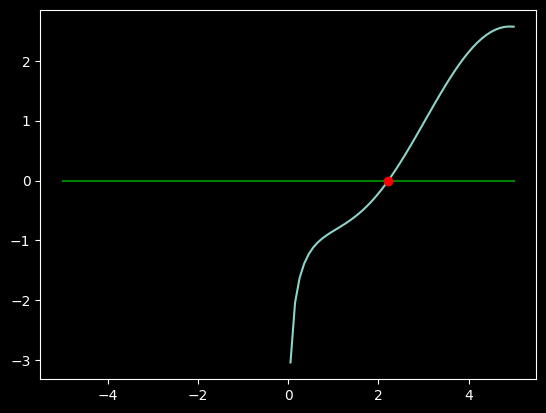

In [14]:
# 4
def function(x):
    return np.log(x) - np.sin(x)


just_draw(function)
root = Newton_method(function, [0, 4])
just_draw(function, root)
print("Root:", root)

5. $ sin x + x - 1 = 0$


Iteration 0
Root: 0.510957966952426


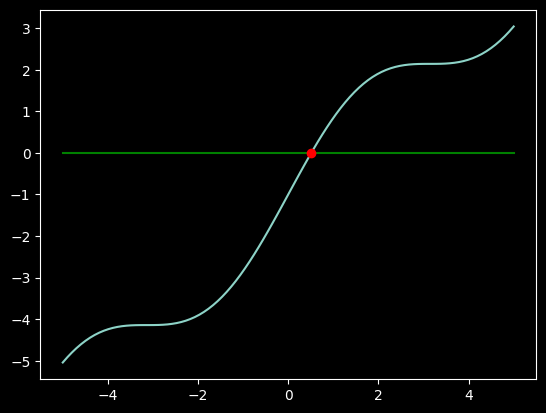

In [15]:
# 5
def function(x):
    return np.sin(x) + x - 1


just_draw(function)
root = Newton_method(function, [-1, 2])
just_draw(function, root)
print("Root:", root)

6. $x^3 - 5x^2 + 2x + 8 = 0$


Iteration 5
Root: -1.0000090484037985


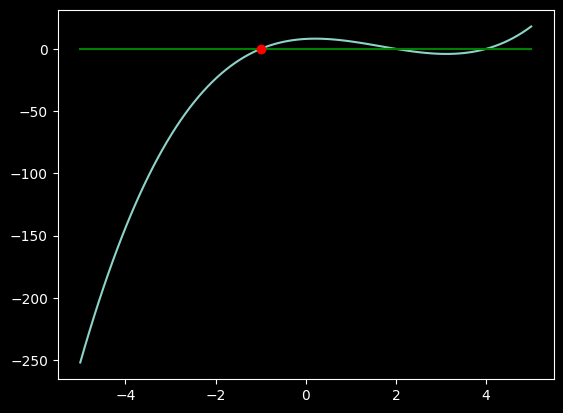

In [16]:
# 6
def function(x):
    return x**3 - 5 * x**2 + 2 * x + 8


just_draw(function)
root = Newton_method(function, [-5, 5])
just_draw(function, root)
print("Root:", root)

## Метод простых итераций


**Основная идея метода**

Численный метод решения нелинейных уравнений, основанный на преобразовании исходного уравнения в эквивалентное уравнение, которое имеет фиксированную точку. Затем производится последовательное приближение к этой фиксированной точке, пока не будет достигнута заданная точность.


**Основные свойства метода**

Условия сходимости метода простых итераций:

1. Функция $g(x)$ должна быть непрерывной на заданном интервале.

2. Функция $g(x)$ должна быть дифференцируемой на заданном интервале.

3. На заданном интервале должно выполняться условие $|g'(x)| < 1$

Сходимость может быть линейной или квадратичной, в зависимости от значения производной функции $g(x)$.

Линейная сходимость означает, что каждая итерация уменьшает ошибку в два раза. Квадратичная сходимость означает, что каждая итерация уменьшает ошибку в четыре раза.


**Алгоритм метода**

1. Из исходного уравнения выражаем $x$ как $x = g(x)$
2. Выбираем начальное значение $x = x_0$
3. Пока $f(x) \geq \varepsilon$\
   $x_{n+1} = g(x_n)$

_Последовательность $x_n$ должна сходиться_


In [17]:
def simple_iteration(
    func, limits=[-100, 100], x=None, epsilon=0.01, max_iterations=100_000
):
    if x is None:
        x = sum(limits) / 2

    for iteration in range(max_iterations):
        x = func(x)
        if abs(x - func(x)) < epsilon:
            print("Iteration", iteration)
            return x
        if not (limits[0] <= x <= limits[1]):
            raise ValueError("Root was not found on the segment")
    RuntimeError("The maximum number of iterations has been exceeded")

---
### Задание

1. $x^3 + 4x - 4 = 0$

2. $x^3 + 0.5x - 1 = 0$

3. $\cos x + 2x - 1.5 = 0$

4. $\ln x - \sin x = 0$

5. $\sin x + x - 1 = 0$

6. $x^3 - 5x^2 + 2x + 8 = 0$
---


1. $x^3 + 4x - 4 = 0$


Iteration 5
Root: 0.8417380214641225


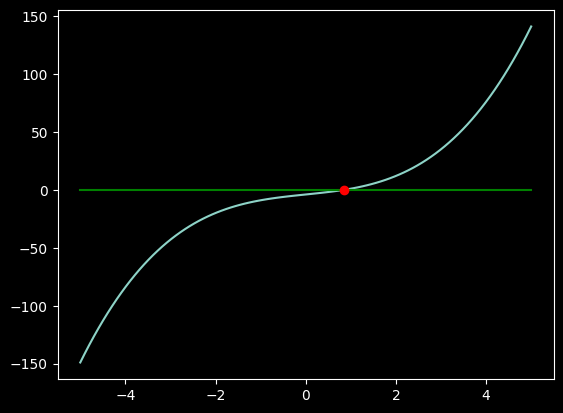

In [174]:
# 1
def function(x):
    return x**3 + 4 * x - 4


def x_function(x):
    return (x**3 - 4) / -4


just_draw(function)
root = simple_iteration(x_function, [-1, 2])
just_draw(function, root)
print("Root:", root)

2. $x^3 + 0.5x - 1 = 0$


Iteration 2
Root: 0.8327777514341524


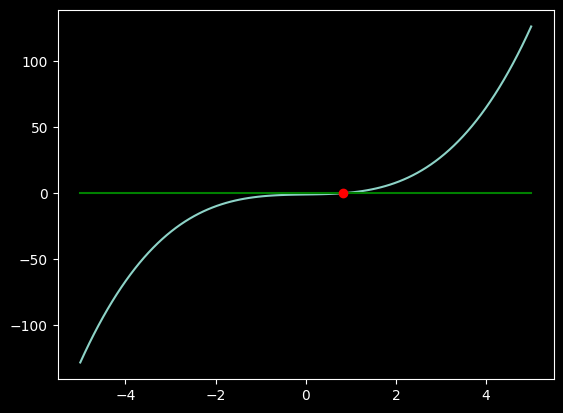

In [19]:
# 2
def function(x):
    return x**3 + 0.5 * x - 1


def x_function(x):
    return (1 - x / 2) ** (1 / 3)


just_draw(function)
root = simple_iteration(x_function, [0, 2])
just_draw(function, root)
print("Root:", root)

3. $\cos x + 2x - 1.5 = 0$


Iteration 1
Root: 0.26554378914467763


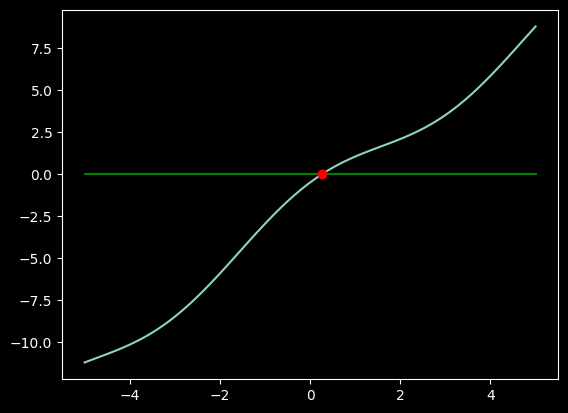

In [20]:
# 3
def function(x):
    return np.cos(x) + 2 * x - 1.5


def x_function(x):
    return (1.5 - np.cos(x)) / 2


just_draw(function)
root = simple_iteration(x_function, [-1, 1])
just_draw(function, root)
print("Root:", root)

4. $\ln x - sin x = 0$


Iteration 1
Root: 2.215222027767241


C:\Users\DaSh-More\AppData\Local\Temp\ipykernel_2072\3755707350.py:3: RuntimeWarning: invalid value encountered in log
  return np.log(x) - np.sin(x)


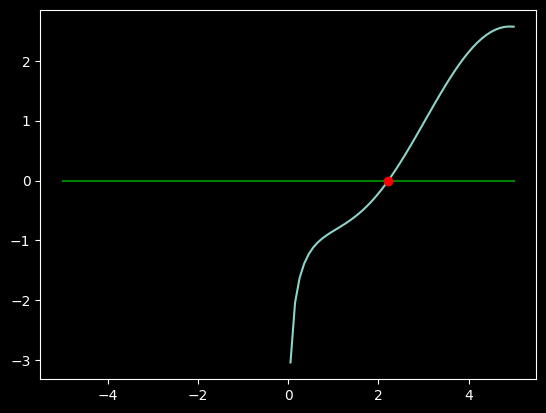

In [21]:
# 4
def function(x):
    return np.log(x) - np.sin(x)


def x_function(x):
    return (np.e ** (np.sin(x)) + x) / 2


just_draw(function)
root = simple_iteration(x_function, [0, 4])
just_draw(function, root)
print("Root:", root)

5. $ sin x + x - 1 = 0$


Iteration 5
Root: 0.5061361540423625


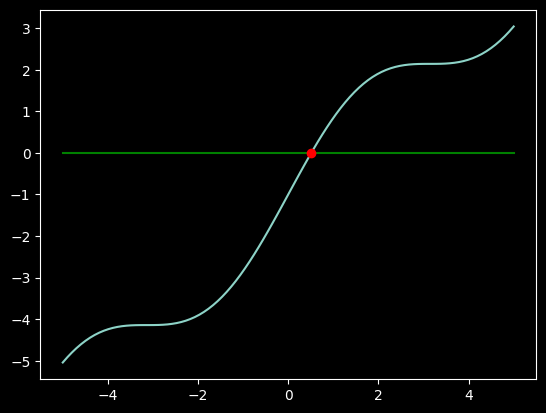

In [22]:
# 5
def function(x):
    return np.sin(x) + x - 1


def x_function(x):
    return 1 - np.sin(x)


just_draw(function)
root = simple_iteration(x_function, [-1, 2])
just_draw(function, root)
print("Root:", root)

6. $x^3 - 5x^2 + 2x + 8 = 0$


Iteration 20
Root: 3.960522614202468


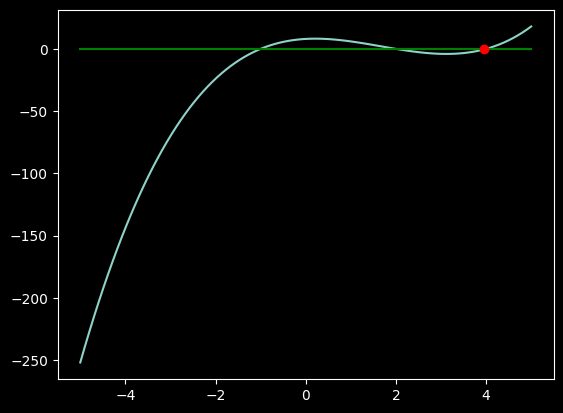

In [23]:
# 6
def function(x):
    return x**3 - 5 * x**2 + 2 * x + 8


def x_function(x):
    t = -(-5 * x**2 + 2 * x + 8)
    return (abs(t) ** (1 / 3)) * np.sign(t)


just_draw(function)
root = simple_iteration(x_function, [-5, 5])
just_draw(function, root)
print("Root:", root)

---


## Метод хорд


**Основная идея метода**

Технический прием для функций бОльшей степени, при котором между двумя крайними точнками функции на заданном отрезке проводится хорда. Точкой $c$ обозначенется точка пресеченния $Ох$ с хордой. Выбирается точка $f(x\ \text{или}\ y)f(с) < 0$ и далее переобзначается отрезок. Корень считается найденным если $|c_{i+1} - c_i|<\varepsilon$


**Основные свойства метода**

Если $f(x)$ дважды непрерывно дифференцируемая функция, и знак $f''(x)$ сохраняется на рассмтриваемом промежутке, то полученные приближения будут сходиться к корню монотонно. Если корень $k$ уравнения $f(k) = 0 $ находится на отрезке $[a, b]$, производные $f'(x)$ и $f''(x)$ на этом промежутке напрерывны и сохраняют постоянные знаки и $f''(b)f(b)>0$, то можно доказать, что погрешность приближенного решения стремится к $0$ при $n \rightarrow \infty$, то есть метод сходитя и сходится со скоростью геометрической прогрессии.


**Алгоритм метода**


1. Задаем промежуток $[a, b]$ на котором будем искать корень
2. Найдем точку $c = \frac{a\cdot y(b) - b\cdot y(a)}{y(b) - y(a)}$
3. Если $|c_{i+1} - c_i|<\varepsilon$, то считаем что корень найден и равен $c_{i+1}$
4. Если корень не найден
    - Если $f(a)f(c) < 0 \Rightarrow b = c$
    - Иначе $a = c$\
    Возвращаемся к шагу 2


In [61]:
def chord_method(func, limits=[-100, 100], epsilon=0.01, max_iterations=100_000):
    c = float("inf")
    var_limits = limits.copy()
    for iteration in range(max_iterations):
        last_c = c
        a, b = var_limits
        c = (a * func(b) - b * func(a)) / (func(b) - func(a))
        if not (limits[0] <= c <= limits[1]):
            raise ValueError("Root was not found on the segment")
        if abs(c - last_c) < epsilon:
            print("Iteration", iteration)
            return c
        var_limits[int(a * c < 0)] = c
    raise RuntimeError("The maximum number of iterations has been exceeded")

---
### Задание

1. $\cos x - x = 0$

2. $\ln x - \sin x = 0$

3. $\ln x - \frac{1}{x} = 0$

4. $x^3 + 8x - 5 = 0$

5. $x^3 + 15x - 10 = 0$
---


1. $\cos x - x = 0$


Iteration 3
Root: 0.7387261057939827


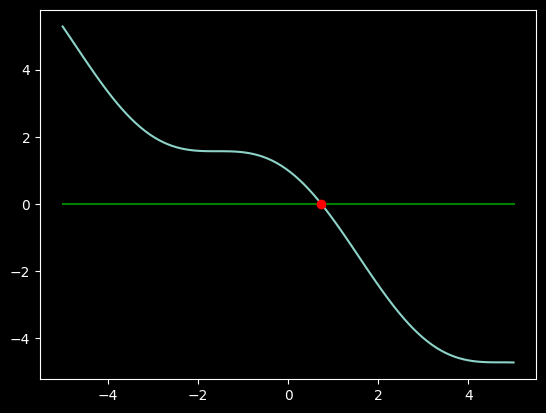

In [63]:
def function(x):
    return np.cos(x) - x


just_draw(function)
root = chord_method(function, [0, 2])
just_draw(function, root)
print("Root:", root)


2. $\ln x - \sin x = 0$


Iteration 3
Root: 2.2186609704624596


C:\Users\DaSh-More\AppData\Local\Temp\ipykernel_2072\3713367302.py:2: RuntimeWarning: invalid value encountered in log
  return np.log(x) - np.sin(x)


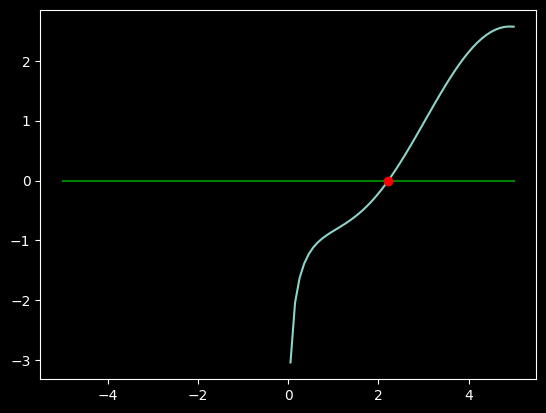

In [64]:
def function(x):
    return np.log(x) - np.sin(x)


just_draw(function)
root = chord_method(function, [1.5, 4])
just_draw(function, root)
print("Root:", root)


3. $\ln x - \frac{1}{x} = 0$


Iteration 5
Root: 1.7613642825450961


C:\Users\DaSh-More\AppData\Local\Temp\ipykernel_2072\1130113729.py:2: RuntimeWarning: invalid value encountered in log
  return np.log(x) - 1/x


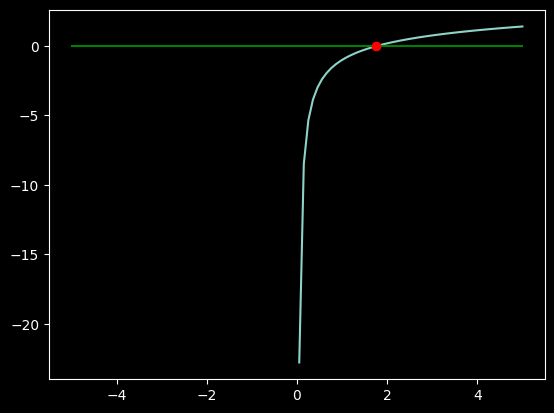

In [65]:
def function(x):
    return np.log(x) - 1 / x


just_draw(function)
root = chord_method(function, [1.5, 3])
just_draw(function, root)
print("Root:", root)


4. $x^3 + 8x - 5 = 0$


Iteration 4
Root: 0.5961207681458554


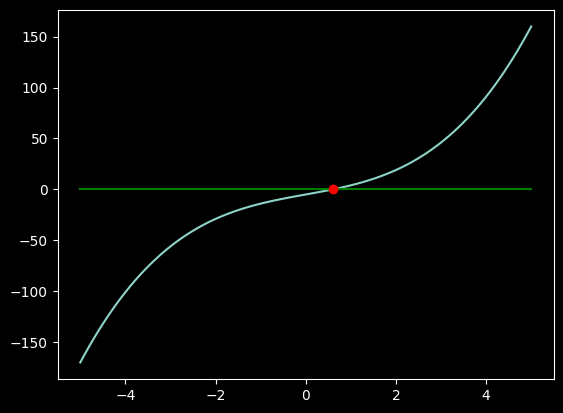

In [67]:
def function(x):
    return x**3 + 8 * x - 5


just_draw(function)
root = chord_method(function, [0, 2])
just_draw(function, root)
print("Root:", root)


5. $x^3 + 15x - 10 = 0$


Iteration 3
Root: 0.6472986060973975


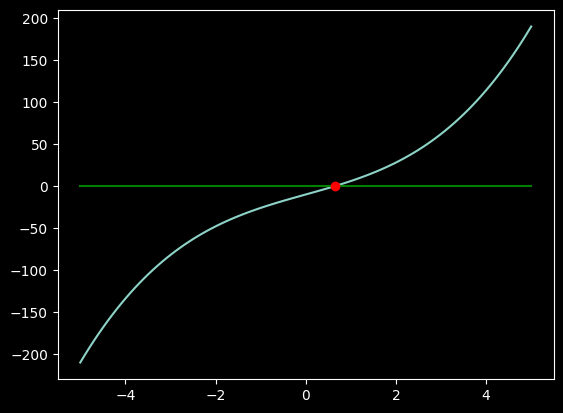

In [69]:
def function(x):
    return x**3 + 15 * x - 10


just_draw(function)
root = chord_method(function, [0, 2])
just_draw(function, root)
print("Root:", root)


1*. $x^3 + 5x - 1 = 0$

Iteration 3
Root: 0.1902769156511003


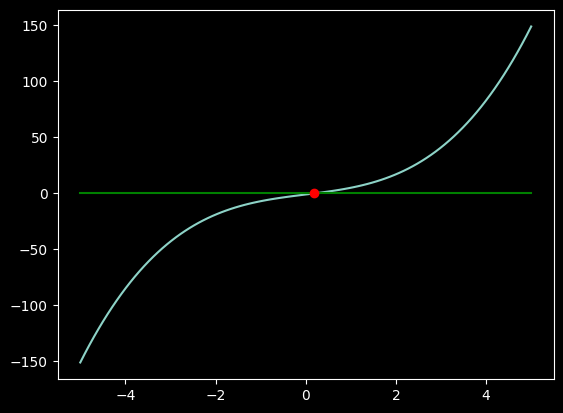

In [82]:
def function(x):
    return x**3 + 5*x - 1


just_draw(function)
root = chord_method(function, [0, 2])
just_draw(function, root)
print("Root:", root)


2*. $x^3 + 9x - 11 = 0$

Iteration 3
Root: 1.0785992658046726


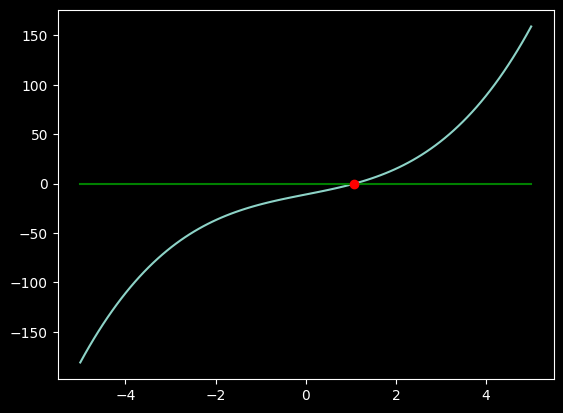

In [83]:
def function(x):
    return x**3 + 9*x - 11


just_draw(function)
root = chord_method(function, [0, 2])
just_draw(function, root)
print("Root:", root)


## Комбинированный метод хорд и касательных


**Основная идея метода**

Методы хорд и касательных дают приближения корня с разных сторон. Поэтому их часто применяют в сочетании друг с другом, тогда уточнение корня происходит быстрее.


**Основные свойства метода**

1. Позволяет решать нелинейные уравнения $y(x) = 0$ с заданной точностью $\varepsilon$.

2. Приближение к искомому корню происходит одновременно с двух сторон отрезка, на котором расположен корень уравнения.

3. Начальным приближением в методе касательных служит тот конец отрезка, для которого выполняется условие $y(x0)y''(x0) > 0$.


**Алгоритм метода**

1. Задаем промежуток $[a,b]$ на котором будем искать корень
2. Вычисляем новые $a$ и $b$\
    $a_{k+1} = a_k - \frac{y(a_k)}{y'(a_k)}$\
    $b_{k+1} = \frac{a\cdot y(b) - b\cdot y(a)}{y(b) - y(a)}$\
    <span style="color: orange">(Если y(b)y''(b) > 0 то формулы меняются местами)</span>
3. Если $|b_{k+1} - a_{k+1}| < \varepsilon$ считаем что корень равен $(a_{k+1} + b_{k+1})/2$\
    Иначе возвращаемся на шаг 2


In [76]:
def Newton_chord_comb_method(
    func, limits=[-100, 100], epsilon=0.01, max_iterations=100_000
):
    func_dif = diff(func)
    func_dif2 = diff(func_dif)
    var_limits = limits.copy()
    if func(var_limits[1]) * func_dif2(var_limits[1]) > 0:
        var_limits = var_limits[::-1]

    for iteration in range(max_iterations):
        old_a = var_limits[0]
        if abs(var_limits[1] - var_limits[0]) < epsilon:
            print("Iteration", iteration)
            return sum(var_limits) / 2
        var_limits[0] -= func(var_limits[0]) / func_dif(var_limits[0])
        var_limits[1] = (old_a * func(var_limits[1]) - var_limits[1] * func(old_a)) / (
            func(var_limits[1]) - func(old_a)
        )
        if not (limits[0] <= sum(var_limits) / 2 <= limits[1]):
            raise ValueError("Root was not found on the segment")
    raise RuntimeError("The maximum number of iterations has been exceeded")

---
### Задание

1. $\cos x - x = 0$

2. $\ln x - \sin x = 0$

3. $\ln x - \frac{1}{x} = 0$

4. $x^3 + 8x - 5 = 0$

5. $x^3 + 15x - 10 = 0$
---


1. $\cos x - x = 0$


Iteration 3
Root: 0.7390886329309723


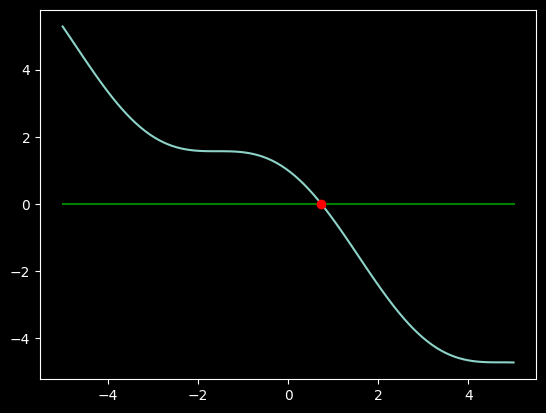

In [77]:
def function(x):
    return np.cos(x) - x


just_draw(function)
root = Newton_chord_comb_method(function, [0, 2])
just_draw(function, root)
print("Root:", root)


2. $\ln x - \sin x = 0$


Iteration 3
Root: 2.219112474359486


C:\Users\DaSh-More\AppData\Local\Temp\ipykernel_2072\1515002906.py:2: RuntimeWarning: invalid value encountered in log
  return np.log(x) - np.sin(x)


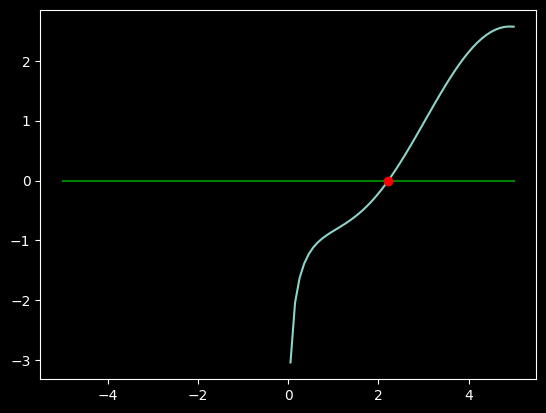

In [78]:
def function(x):
    return np.log(x) - np.sin(x)


just_draw(function)
root = Newton_chord_comb_method(function, [1.5, 4])
just_draw(function, root)
print("Root:", root)


3. $\ln x - \frac{1}{x} = 0$


Iteration 2
Root: 1.7637078222891747


C:\Users\DaSh-More\AppData\Local\Temp\ipykernel_2072\2659313794.py:2: RuntimeWarning: invalid value encountered in log
  return np.log(x) - 1 / x


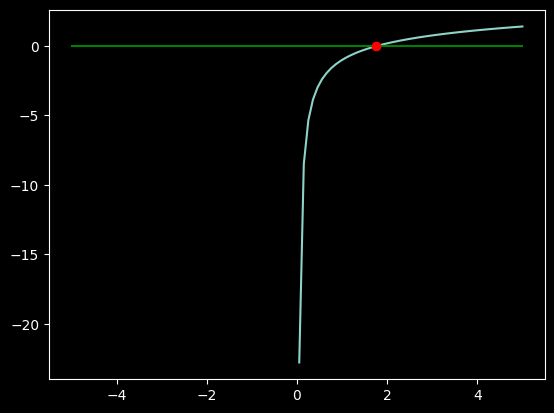

In [79]:
def function(x):
    return np.log(x) - 1 / x


just_draw(function)
root = Newton_chord_comb_method(function, [1.5, 3])
just_draw(function, root)
print("Root:", root)


4. $x^3 + 8x - 5 = 0$


Iteration 3
Root: 0.5983948583726679


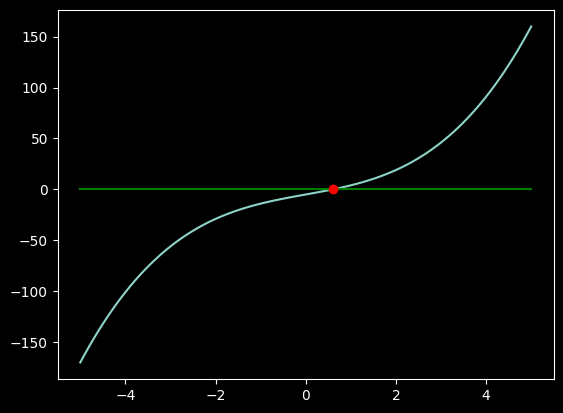

In [80]:
def function(x):
    return x**3 + 8 * x - 5


just_draw(function)
root = Newton_chord_comb_method(function, [0, 2])
just_draw(function, root)
print("Root:", root)


5. $x^3 + 15x - 10 = 0$


Iteration 3
Root: 0.6484941560153523


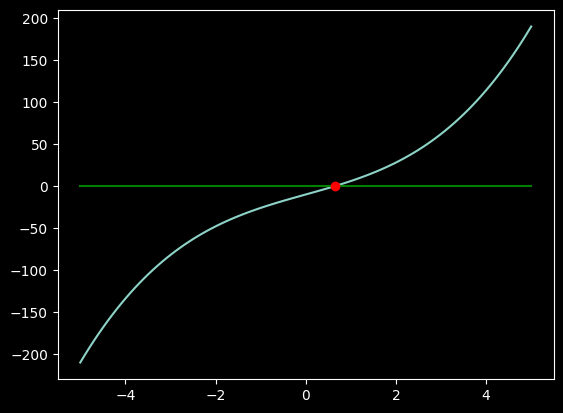

In [81]:
def function(x):
    return x**3 + 15 * x - 10


just_draw(function)
root = Newton_chord_comb_method(function, [0, 2])
just_draw(function, root)
print("Root:", root)


1*. $x^3 + 5x - 4 = 0$

Iteration 3
Root: 0.7243936266618645


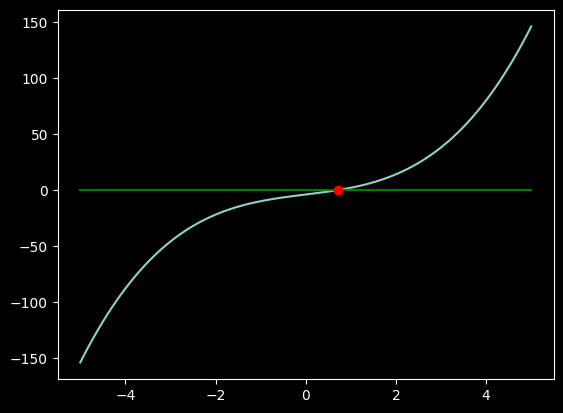

In [84]:
def function(x):
    return x**3 + 5 * x - 4


just_draw(function)
root = Newton_chord_comb_method(function, [0, 2])
just_draw(function, root)
print("Root:", root)


2*. $x^3 + 0.4x - 1.2 = 0$

Iteration 4
Root: 0.937712504094484


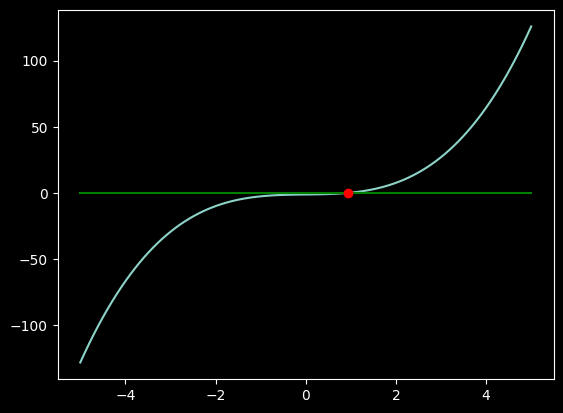

In [85]:
def function(x):
    return x**3 + 0.4 * x - 1.2


just_draw(function)
root = Newton_chord_comb_method(function, [0, 2])
just_draw(function, root)
print("Root:", root)


---


# Методы решения СЛАУ


## Задание

-   разработать программы решения СЛАУ методами Якоби, Зейделя, релаксации;
-   проверить условия сходимости итерационного процесса;
-   проверить условия применения метода решения СЛАУ;
-   исследовать сходимость методов для задачи (погрешность 0,0001), сравниваем сходимость методов;
-   исследовать сходимость метода релаксации в зависимости от параметра релаксации.
    Начальное приближение задавать как вектор случайных значений.


$$
1) \begin{cases}
x_1=0.16 x_1+0.13 x_2-0.32 x_3-0.16 x_4-0.64\\
x_2=0.34 x_1-0.08 x_2+0.15 x_3-0.18 x_4+1.42\\
x_3=0.15 x_1+0.32 x_2+0.13 x_3-0.25 x_4-2.06\\
x_4=0.11 x_1-0.26 x_2-0.08 x_3+0.24 x_4+0.83
\end{cases}
$$

In [161]:
A1 = np.array(
    [
        [0.84, -0.13, 0.32, 0.16],
        [-0.34, -1.08, -0.15, 0.18],
        [-0.15, -0.32, 1.13, 0.25],
        [-0.11, 0.26, 0.08, 0.76],
    ]
)
B1 = [0.64, -1.42, 2.06, -0.83]


$$
2)
\begin{cases}
x_1=0.26 x_1-0.14 x_2+0.02 x_3+0.24 x_4+1.73\\
x_2=0.15 x_1+0.12 x_2-0.17 x_3+0.26 x_4-0.65\\
x_3=0.35 x_1+0.22 x_2-0.03 x_3-0.27 x_4+2.26\\
x_4=0.12 x_1+0.24 x_2-0.15 x_3+0.23 x_4-1.17
\end{cases}
$$



In [162]:
A2 = np.array(
    [
        [0.74, 0.14, -0.02, -0.24],
        [-0.15, 0.88, 0.17, -0.26],
        [-0.35, -0.22, -1.03, 0.27],
        [-0.12, -0.24, 0.15, 0.77],
    ]
)

B2 = [1.73, -0.65, 2.26, -1.17]


---
## Метод Якоби


**Основная идея метода**

Разложить матрицу $ A $ на диагональную и остаточную части: $ A = D + R $, где $ D $ – диагональная матрица, содержащая элементы главной диагонали матрицы $ A $, а $ R $ – остаточная матрица, содержащая все остальные элементы. Выразить вектор неизвестных $ x $ через диагональную матрицу $ D $, остаточную матрицу $ R $ и вектор правой части $ b $: $ x = D^{-1}(b - Rx) $. Начать итерационный процесс, заменяя вектор неизвестных $ x $ на новые значения, полученные из предыдущего шага, до достижения заданной точности или количества итераций.


**Основные свойства метода**

- _Сходимость_:\
Метод Якоби сходится, если матрица системы является строго диагонально преобладающей или симметричной положительно определенной. Это означает, что на главной диагонали матрицы стоят наибольшие по модулю элементы, и сумма модулей остальных элементов в каждой строке меньше модуля элемента на главной диагонали.

- _Необходимость диагонального преобладания_:\
Метод Якоби требует, чтобы матрица системы была диагонально преобладающей. Это означает, что на главной диагонали матрицы стоят наибольшие по модулю элементы, и сумма модулей остальных элементов в каждой строке меньше модуля элемента на главной диагонали. Если матрица не обладает этим свойством, метод Якоби может не сойтись или сойтись медленно.

- _Независимость переменных_:\
Метод Якоби решает систему линейных уравнений, предполагая, что переменные являются независимыми. Это означает, что каждая переменная обновляется на основе предыдущих значений всех остальных переменных. Таким образом, метод Якоби не учитывает возможные зависимости между переменными и может давать приближенное решение.

**Алгоритм метода**

1. Разложить матрицу системы $ A $ на сумму диагональной матрицы $ D $ и остаточной матрицы $ R $:
   $ A = D + R $

2. Выразить вектор неизвестных $ x $ через диагональную матрицу $ D $, остаточную матрицу $ R $ и вектор правой части $ b $:
   $ x = D^{-1}(b - Rx) $

3. Начать итерационный процесс, заменяя вектор неизвестных $ x $ на новые значения, полученные из предыдущего шага, до достижения заданной точности или количества итераций.

Метод Якоби продолжает итерации до тех пор, пока не будет достигнута заданная точность или количество итераций. Каждая итерация уточняет решение системы, пока не будет достигнута требуемая точность.


In [149]:
def is_complete(x_old, x_new):
    eps = 0.0001
    sum_up = 0
    sum_low = 0
    for k in range(0, len(x_old)):
        sum_up += (x_new[k] - x_old[k]) ** 2
        sum_low += (x_new[k]) ** 2

    return (sum_up / sum_low)**0.5 < eps


def Yacob_method(a, b, max_iterations=100_000):
    count = len(b)

    x = [1] * count

    for iteration in range(max_iterations):
        x_prev = copy.deepcopy(x)
        for k in range(0, count):
            S = 0
            for j in range(0, count):
                if j != k:
                    S = S + a[k][j] * x[j]
                    
            x[k] = b[k] / a[k][k] - S / a[k][k]

        if is_complete(x_prev, x): 
            print("Iteration:", iteration)
            return x
    raise RuntimeError("The maximum number of iterations has been exceeded")

In [163]:
x = Yacob_method(A1, B1)
print(x)
print("Остатки:", A1 @ x - B1)


Iteration: 7
[0.2478712951919595, 0.6514771279502272, 2.3787901346202305, -1.5295018704810026]
Остатки: [ 1.24051292e-05 -3.95431127e-07  4.00927774e-06  0.00000000e+00]


In [169]:
x = Yacob_method(A2, B2)
print(x)
print("Остатки:", A2 @ x - B2)


Iteration: 5
[2.05711035934217, 0.026150821546890635, -3.0549055680715274, -0.59562951233371]
Остатки: [-2.80247487e-05 -2.41043055e-05 -9.03972650e-06  0.00000000e+00]


---
## Метод Зейделя


**Основная идея метода**

Выбрать начальное приближение для значений переменных $ x_1, x_2, \ldots, x_n $. Подставить начальное приближение в первое уравнение системы и вычислить новое значение переменной $ x_1 $. Использовать новое значение переменной $ x_1 $ для вычисления нового значения переменной $ x_2 $ во втором уравнении системы. Повторять шаги 2 и 3 для всех переменных до тех пор, пока значения переменных не стабилизируются или не достигнута требуемая точность.


**Основные свойства метода**

- Необходимость выполнения условий сходимости, таких как диагональное преобладание матрицы;

- Более сложная реализация и понимание по сравнению с методом простой итерации.


**Алгоритм метода**

1. Выбираем начальное приближение $x_0$.
2. Для каждого уравнения $i$ в системе: Вычисляем новое приближение $x_i $ по формуле $ x_i = \frac{{b_i - \sum_{j} (a_{ij} \cdot x_j)}}{{a_{ii}}} $, где $ \sum_{j} (a_{ij} \cdot x_j) $ – сумма всех слагаемых, кроме $ a_{ii} \cdot x_i $.
3. Повторяем шаг 2 до тех пор, пока разница между текущим и новым приближением не станет достаточно малой, то есть пока $ |x_{n+1} - x_n| < \varepsilon $, где $ \varepsilon $ - заданная точность.

In [154]:
def Seidel_method(A, b, eps=1e-4):
    n = len(A)
    x = np.zeros_like(b)

    while True:
        old_x = np.copy(x)
        for i in range(n):
            temp1 = np.dot(A[i, :i], x[:i])
            temp2 = np.dot(A[i, i + 1 :], x[i + 1 :])
            x[i] = (b[i] - temp1 - temp2) / A[i, i]

        if np.sqrt(np.dot(x - old_x, x - old_x)) < eps:
            return x

In [164]:
x = Seidel_method(A1, B1)
print(x)
print("Остатки:", A1 @ x - B1)


[ 0.24786534  0.65147885  2.3787884  -1.52950314]
Остатки: [ 6.42480571e-06 -2.04816302e-07  2.07616792e-06 -1.11022302e-16]


In [167]:
x = Seidel_method(A2, B2)
print(x)
print("Остатки:", A2 @ x - B2)


[ 2.05715153  0.02619021 -3.05493626 -0.59560484]
Остатки: [ 2.64562257e-06 -7.24924115e-06  6.15553361e-06  0.00000000e+00]


---
## Метод релаксации

**Основная идея метода**

Основана на идее последовательного приближенного решения системы уравнений. На каждой итерации метода значения неизвестных обновляются с использованием следующей формулы:
 
$ x_{i+1} = (1 - w)x_i + wD^{-1}(b - Lx_{i+1} - Ux_i) $


**Основные свойства метода**

- _Ускорение сходимости:_\
при правильном выборе параметра релаксации, метод может сходиться быстрее, чем метод Зейделя.

- _Возможность параллельной реализации:_\
метод верхней релаксации может быть эффективно распараллелен, что позволяет использовать вычислительные ресурсы более эффективно.

- _Неустойчивость:_\
при неправильном выборе параметра релаксации, метод может не сходиться или сходиться медленно.

- _Зависимость от свойств системы:_\
метод может быть эффективным только для определенных типов систем линейных уравнений, и может быть неэффективным или не сходиться для других типов систем.

**Алгоритм метода**

1. Cистему линейных уравнений можно записать в виде: $ Ax = b $, где $ A $ – матрица коэффициентов, $ x $ – вектор неизвестных, $ b $ – вектор правой части.

2. Значения неизвестных обновляются с использованием следующей формулы:
   $$x_{i+1} = (1 - w)x_i + wD^{-1}(b - Lx_{i+1} - Ux_i)$$
   где 
   - $ x_i $ – вектор неизвестных на $ i $-ой итерации
   - $ w $ – параметр релаксации $ (0 < w < 2) $
   - $ D $ – диагональная матрица,
   - $ L $ – нижняя треугольная матрица
   - $ U $ – верхняя треугольная матрица.

   Параметр релаксации $ w $ позволяет контролировать скорость сходимости метода. Значение $ w = 1 $ соответствует методу Зейделя, а значения $ w > 1 $ ускоряют сходимость, но могут привести к неустойчивости метода.


In [157]:
def Relax_method(A, b, omega=1, epsilon=1e-6, max_itereitons=100_000):
    n = len(A)
    x = np.zeros_like(b)

    for _ in range(max_itereitons):
        x_old = x.copy()

        for i in range(n):
            row_sum = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i + 1 :], x[i + 1 :])
            x[i] = (1 - omega) * x_old[i] + omega * (b[i] - row_sum) / A[i, i]

        if np.linalg.norm(x - x_old) < epsilon:
            break

    return x


In [165]:
x = Relax_method(A1, B1)
print(x)
print("Остатки:", A1 @ x - B1)


[ 0.2478589   0.65148072  2.37878653 -1.52950451]
Остатки: [-4.86460942e-08  1.54450630e-09 -1.57302735e-08  0.00000000e+00]


In [168]:
x = Relax_method(A2, B2)
print(x)
print("Остатки:", A2 @ x - B2)


[ 2.05714691  0.02619647 -3.05493002 -0.59560483]
Остатки: [-2.49257182e-08  5.00616737e-09 -2.26495196e-08  0.00000000e+00]
